In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
data = pd.read_csv('../input/digit-recognizer/train.csv')

In [3]:
#split the data into training and testing sets

data = np.array(data)


[m, n] = data.shape
#shuffle the data
np.random.shuffle(data)
ratio = 0.8
num_train = int(len(data)*ratio)
                
#training set
data_train = data[:num_train].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.0

# testing set
data_test = data[num_train:].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.0




In [4]:
print(Y_train.shape)
print(X_train.shape)

print(Y_test.shape)
print(X_test.shape)

print(data_train.shape)
print(data_test.shape)

(33600,)
(784, 33600)
(8400,)
(784, 8400)
(785, 33600)
(785, 8400)


In [5]:
# define NN structure

def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1 , W2, b2

#define ReLU (activiation function)
def ReLU(Z):
    return np.maximum(Z,0)

#define softmax (activiation function)
def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

#predicting the the label should be within the NN
def foward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    #apply the activiation function(ReLU)
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2 , A2

#converting labelled data (Y) into the same shape as our NN output
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_y = one_hot_Y.T
    return one_hot_Y

def ReLU_deriv(Z):
    return Z > 0

#back prop
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    #last layer errors:
    dZ2 = A2 - one_hot_Y.T
    dW2 = 1 / m *  dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    #first layer errors:
    dZ1 = W2.dot(dZ2) * ReLU_deriv(Z1) #undoing ReLU from foward prop
    dW1 = 1 / m *  dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1 ,dW2, db2

#alpha = -> step size
#using back prop errors to calculate our weights and biases (final step in graient descent)
def update_params(W1, b1 , W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


    
    


In [6]:
# gradient descent and fun output freinds
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y / Y.size)

def gradient_descent(X_train, Y_train, X_test, Y_test, alpha, iterations):
    
    
    W1, b1, W2, b2 = init_params()
    # training loop:
    for i in range(iterations):
        # send training set through NN (foward prop)
        Z1, A1, Z2 , A2 = foward_prop(W1, b1, W2, b2, X_train)
        #send training and testing set backwards through NN (back prop)
        dW1, db1 ,dW2, db2 = back_prop(Z1, A1, Z2 , A2, W1, W2, X_train, Y_train)
        #update weights and biases based on back prop errors
        W1, b1, W2, b2 =  update_params(W1, b1 , W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            predictions = get_predictions(A2)
            train_acc = get_accuracy(predictions, Y_train)
            print("Iteration", i)
            print(train_acc)
    return W1, b1, W2, b2 
        
        

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, X_test, Y_test, 0.1, 100)

[0 0 0 ... 0 0 0] [3 6 3 ... 3 7 6]
Iteration 0
3184
[5 3 0 ... 7 0 4] [3 6 3 ... 3 7 6]
Iteration 10
1602
[0 3 0 ... 7 0 4] [3 6 3 ... 3 7 6]
Iteration 20
1591
[0 3 0 ... 7 0 4] [3 6 3 ... 3 7 6]
Iteration 30
1645
[0 3 0 ... 7 0 8] [3 6 3 ... 3 7 6]
Iteration 40
1732
[0 3 0 ... 3 0 8] [3 6 3 ... 3 7 6]
Iteration 50
1891
[0 3 0 ... 3 0 8] [3 6 3 ... 3 7 6]
Iteration 60
2092
[0 3 0 ... 3 0 8] [3 6 3 ... 3 7 6]
Iteration 70
2270
[0 3 0 ... 3 0 8] [3 6 3 ... 3 7 6]
Iteration 80
2430
[0 3 0 ... 3 0 8] [3 6 3 ... 3 7 6]
Iteration 90
2563


In [8]:
#helper functions to visualize training examples

def make_predictions(X,W1,b1,W2,b2):
    _,_,_, A2 = foward_prop(W1,b1,W2,b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_predictions(index,W1,b1,W2,b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2,b2 )
    label = Y_train[index]
    print('Prediction:',prediction)
    print('True Label:', label)
    
    #plotting the actual image for reference
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image,interpolation='nearest')
    plt.show()
    

Prediction: [0]
True Label: 3


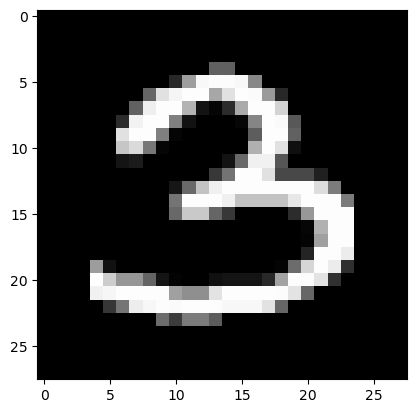

Prediction: [3]
True Label: 3


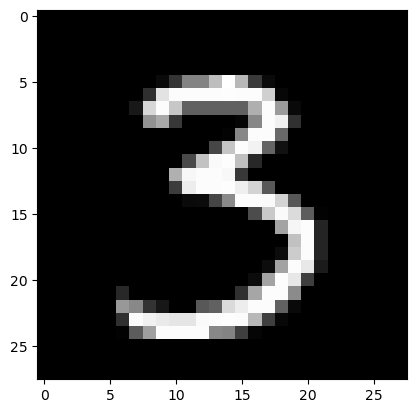

Prediction: [5]
True Label: 5


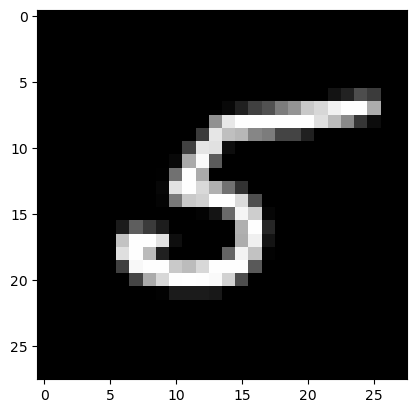

Prediction: [4]
True Label: 5


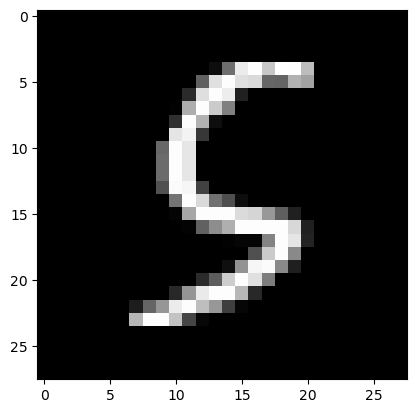

Prediction: [1]
True Label: 1


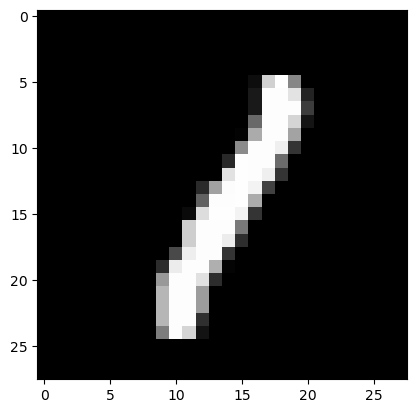

Prediction: [1]
True Label: 1


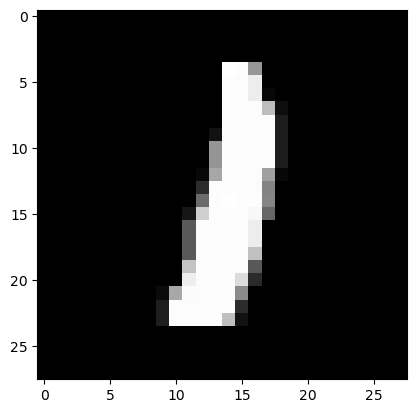

Prediction: [9]
True Label: 9


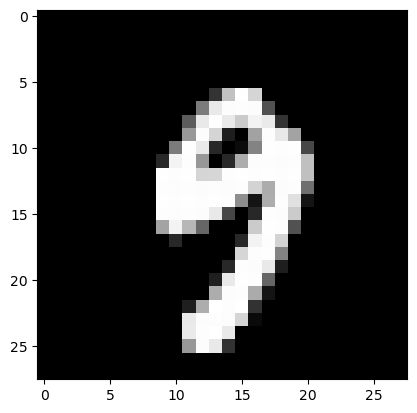

Prediction: [8]
True Label: 6


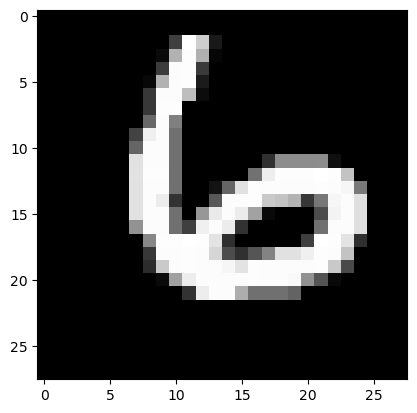

Prediction: [1]
True Label: 1


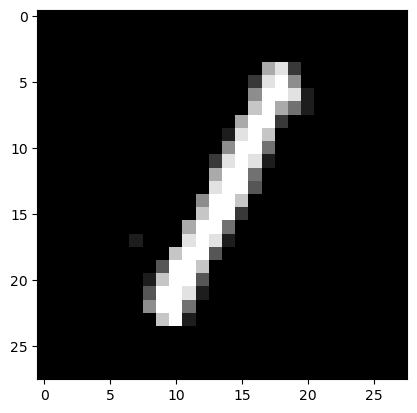

Prediction: [3]
True Label: 3


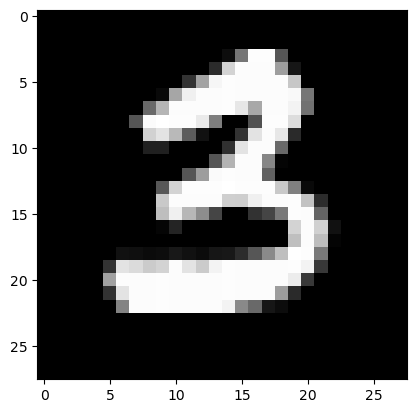

In [9]:
for i in range(0,100,10):
    test_predictions(i,W1,b1,W2,b2)